In [12]:
from quandl import get
from ccxt import kraken
from pandas import DataFrame, merge
from datetime import datetime
from matplotlib import pyplot

In [2]:
quandl_df = get("LBMA/SILVER", authtoken = open("../key").read()[:-1])
initial_data = kraken().fetchOHLCV("LTC/USD", timeframe = "1d")

In [3]:
index, litecoin = [], []
for row in initial_data:
    index.append(datetime.utcfromtimestamp(row[0] / 1000).strftime("%Y-%m-%d"))
    litecoin.append(row[1:])

In [4]:
ccxt_df = DataFrame(litecoin, columns = ["Open", "High", "low", "Close", "Volume"], index = index)

In [21]:
corr_df = quandl_df['2019-01-01':'2019-10-01'].join(ccxt_df['2019-01-01':'2019-10-01']['Close'])
corr_df['USD'].corr(corr_df['Close'])

-0.22869995071607327

(array([737091., 737119., 737150., 737180., 737211., 737241., 737272.,
        737303., 737333.]), <a list of 9 Text xticklabel objects>)

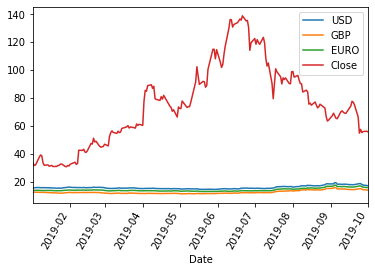

In [24]:
corr_df.plot()
pyplot.xticks(rotation = 60)